<a href="https://colab.research.google.com/github/urvashiramdasani/NLP/blob/main/Book_Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Notebook consists of the code for Book-Genre-Classification. It has been developed as a part of Software Engineering Project. It would be then deployed on Django network. A user has to upload a scanned image of the book cover he wants to sell. Our model will predict the genre of the book by processing the book cover and will auto label the book.

We have used this link to implement this model : https://github.com/akarasman/gutenberg-book-titles-genre-classification/blob/master/gutenberg-book-title-classification.ipynb

## Using NLP

In [ ]:
import pandas as pd
dataset = pd.read_csv("https://raw.githubusercontent.com/urvashiramdasani/Online-Book-Exchange-Portal/master/Dataset/books.csv", 
                   encoding="ISO-8859-1")
dataset.groupby('category').count()['name']

category
Calendars                       2636
Comics & Graphic Novels         3026
Mystery, Thriller & Suspense    1998
Romance                          724
Science Fiction & Fantasy       3800
Test Preparation                2906
Name: name, dtype: int64

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import concurrent.futures
import re
from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

corpus = []
with concurrent.futures.ProcessPoolExecutor() as executor:
    for i in tqdm(range(0, dataset.shape[0])):
        book = re.sub('[^a-zA-Z]', ' ', dataset['name'][i]) # Filter non alphabetical chars
        book = book.lower() # Convert to lowercase
        book = book.split() # Split on spaces
        ps = PorterStemmer() # Stem
        book = [ps.stem(word) for word in book if not word in set(stopwords.words('english'))]
        book = ' '.join(book) 
        corpus.append(book)

100%|██████████| 15091/15091 [00:16<00:00, 888.83it/s] 


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
import joblib
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
# file = open("vectorizer.pkl", 'w')
# pickle.dump(X, file)
joblib.dump(X, 'vectorizer.joblib')

['vectorizer.joblib']

In [ ]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import pickle

title = "Coronavirus Update"
title = title.lower()
title = title.split()
ps = PorterStemmer()
title = [ps.stem(word) for word in title if not word in set(stopwords.words('english'))]
title = ' '.join(title)
import joblib
file = joblib.load("vectorizer.joblib")
# x = file.transform([title])
model = open("model.pkl", "rb")
model = pickle.load(model)
model.predict(title.reshape(-1, 1))

AttributeError: ignored

In [ ]:
print(X)

  (0, 1186)	0.26057789048856567
  (0, 9133)	0.3350578148663078
  (0, 2990)	0.5664980570766057
  (0, 5494)	0.7063394191279252
  (1, 6715)	0.6124202913104387
  (1, 2446)	0.7118053576659301
  (1, 1186)	0.21112927574831286
  (1, 9133)	0.27147550259886694
  (2, 1891)	0.3659639515028605
  (2, 7820)	0.4451138338531303
  (2, 847)	0.30042652707110906
  (2, 4741)	0.3820595449294741
  (2, 5874)	0.4007540376484067
  (2, 9211)	0.3413368944537036
  (2, 5491)	0.3931968881698531
  (3, 2118)	0.39724164875808626
  (3, 6102)	0.5213350679577673
  (3, 1647)	0.5119511382915182
  (3, 1293)	0.49656895895938835
  (3, 1186)	0.24846351927282156
  (4, 2742)	0.4578066489933878
  (4, 1577)	0.5184375602677769
  (4, 7663)	0.6881070169872471
  (4, 1186)	0.21941809727994785
  (5, 9277)	0.5560378177261882
  :	:
  (15084, 8762)	0.5097344692435538
  (15085, 6138)	0.7341182703646624
  (15085, 7126)	0.6790216234530358
  (15086, 7454)	0.3753931240579957
  (15086, 5881)	0.16514775637862295
  (15086, 2431)	0.7507862481159914
 

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = dataset['category'].values # Get target categories
y[-1] = 'Romance'
print(y, y.shape)
y = label_encoder.fit_transform(y) # Encode category labels to integers

['Calendars' 'Calendars' 'Calendars' ... 'Romance' 'Romance' 'Romance'] (15091,)


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.01, random_state = 0)
print(X_train.shape, X_test.shape)

(14940, 9514) (151, 9514)


In [ ]:
name_map = pd.DataFrame.from_dict(dict(zip(label_encoder.classes_, 
                                           label_encoder.transform(label_encoder.classes_))), 
                                  orient='index')
print(name_map)

                              0
Calendars                     0
Comics & Graphic Novels       1
Mystery, Thriller & Suspense  2
Romance                       3
Science Fiction & Fantasy     4
Test Preparation              5


In [ ]:
## This import is useful later 
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50, max_depth=200, criterion='entropy', 
                                    warm_start=True, n_jobs=4, verbose=True)
rf.fit(X_train, y_train)

# Evaluate on train and test set
print("Train set score:", rf.score(X_train, y_train))
print("Test set score:", rf.score(X_test, y_test))

# Generate classification report
y_pred = rf.predict(X_test)
print(classification_report(y_test.astype(int), y_pred))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.8s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    5.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


Train set score: 0.9159127195316658
Test set score: 0.7953216374269005
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        33
           1       0.88      0.85      0.86        26
           2       0.69      0.69      0.69        16
           3       0.79      0.39      0.52        28
           4       0.59      0.90      0.71        39
           5       1.00      0.93      0.96        29

    accuracy                           0.80       171
   macro avg       0.82      0.78      0.78       171
weighted avg       0.82      0.80      0.79       171



In [ ]:
from xgboost import XGBClassifier
import joblib

xgb = XGBClassifier(max_depth=50, n_estimators=100, booster='gbtree',
                            objective='reg:logistic', gamma=0.1, rate_drop=0.3, 
                            nthread=4, verbosity=0);
xgb.fit(X_train, y_train)

# Evaluate and dump
print("Train set score:", xgb.score(X_train, y_train))
print("Test set score:", xgb.score(X_test, y_test))
# Generate classification report
y_pred = xgb.predict(X_test)
print(classification_report(y_test.astype(int), y_pred))

# Save the model
joblib.dump(name_map, './name_map.joblib', compress = True)
joblib.dump(xgb, './gradient_boost.joblib', compress = True)

Train set score: 0.9291834002677376
Test set score: 0.8410596026490066
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       0.87      0.79      0.83        34
           2       0.58      0.54      0.56        13
           3       0.50      0.29      0.36         7
           4       0.69      0.85      0.76        34
           5       1.00      0.97      0.99        35

    accuracy                           0.84       151
   macro avg       0.77      0.74      0.75       151
weighted avg       0.84      0.84      0.84       151



['./gradient_boost.joblib']

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB(alpha=0.1, fit_prior=True, class_prior=None)
nb.fit(X_train, y_train)
    
# Evaluate and dump
print("Train set score:", nb.score(X_train, y_train))
print("Test set score:", nb.score(X_test, y_test))

# Generate classification report
y_pred = nb.predict(X_test)
print(classification_report(y_test.astype(int), y_pred))

Train set score: 0.9344805156407072
Test set score: 0.8070175438596491
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        33
           1       0.79      0.85      0.81        26
           2       0.69      0.69      0.69        16
           3       0.77      0.61      0.68        28
           4       0.72      0.72      0.72        39
           5       0.94      1.00      0.97        29

    accuracy                           0.81       171
   macro avg       0.80      0.80      0.80       171
weighted avg       0.80      0.81      0.80       171



In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='sag',max_iter=200,random_state=450,
                                             n_jobs=4, verbose=True)
lr.fit(X_train, y_train)
        
# Evaluate on train and test set
print("Train set score:", lr.score(X_train, y_train))
print("Train set score:", lr.score(X_test, y_test))

# Generate classification report
y_pred = lr.predict(X_test)
print(classification_report(y_test.astype(int), y_pred))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


convergence after 20 epochs took 0 seconds
Train set score: 0.9258366800535476
Train set score: 0.9072847682119205
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       0.89      0.94      0.91        34
           2       0.82      0.69      0.75        13
           3       1.00      0.29      0.44         7
           4       0.79      0.91      0.85        34
           5       1.00      1.00      1.00        35

    accuracy                           0.91       151
   macro avg       0.92      0.81      0.83       151
weighted avg       0.91      0.91      0.90       151



[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.2s finished


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical

## Tokenize
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
X = tokenizer.texts_to_sequences(corpus)
max_features=len(tokenizer.word_index) + 1

## Pad sequences
X = sequence.pad_sequences(X, maxlen=100)

## Encode labels
label_encoder = LabelEncoder()
y = to_categorical(label_encoder.fit_transform(dataset['category'].values))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.01, 
                                                    random_state = 0)

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, LSTM, Conv1D, GlobalMaxPooling1D,\
                         Dense, Dropout, Activation
import numpy as np

In [ ]:
ann = Sequential()

## EMBEDDING LAYER ##
ann.add(Embedding(max_features, 50, input_length=100))
ann.add(Flatten())

## HIDDEN LAYER ##    
ann.add(Dense(256))
ann.add(Dropout(0.1))
ann.add(Activation('relu'))
    
## OUTPUT LAYER ##
ann.add(Dense(6))
ann.add(Activation('softmax'))

ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
ann.fit(X_train, y_train, batch_size=256, epochs=2)

In [ ]:
y_pred_test = ann.predict_classes(X_test)
y_true_test = np.argmax(y_test, axis=1)
y_pred_train = ann.predict_classes(X_train)
y_true_train = np.argmax(y_train,axis=1)

print("Train set score:", accuracy_score(y_pred_train, y_true_train))
print("Test set score:", accuracy_score(y_pred_test, y_true_test))
print(classification_report(y_pred_test, y_true_test))

In [ ]:
cnn = Sequential()

## EMBEDDING LAYER ##
cnn.add(Embedding(max_features, 50, input_length=100))
cnn.add(Dropout(0.2))
 
## CONVOLUTIONAL LAYER ##
cnn.add(Conv1D(250, 10, padding='valid', activation='relu',
                 strides=1));
cnn.add(GlobalMaxPooling1D())
 
## DENSE LAYER ##
cnn.add(Dense(64))
cnn.add(Dropout(0.1))
cnn.add(Activation('relu'))
    
## OUTPUT LAYER ##
cnn.add(Dense(6))
cnn.add(Activation('softmax'))

cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn.fit(X_train, y_train, batch_size=256, epochs=2)

In [ ]:
y_pred_test = cnn.predict_classes(X_test)
y_true_test = np.argmax(y_test, axis=1)
y_pred_train = cnn.predict_classes(X_train)
y_true_train = np.argmax(y_train,axis=1)

print("Train set score:", accuracy_score(y_pred_train, y_true_train))
print("Test set score:", accuracy_score(y_pred_test, y_true_test))
print(classification_report(y_pred_test, y_true_test))

In [ ]:
lstm = Sequential()

## EMBEDDING LAYER ##
lstm.add(Embedding(max_features, 50, input_length=100))
lstm.add(Dropout(0.2))
    
## LSTM LAYER #
lstm.add(LSTM(124, dropout=0.2, recurrent_dropout=0.2))
    
## OUTPUT LAYER ##
lstm.add(Dense(6))
lstm.add(Activation('softmax'))

lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm.fit(X_train, y_train, batch_size=256, epochs=2)

In [ ]:
y_pred_test = cnn.predict_classes(X_test)
y_true_test = np.argmax(y_test, axis=1)
y_pred_train = cnn.predict_classes(X_train)
y_true_train = np.argmax(y_train,axis=1)

print("Train set score:", accuracy_score(y_pred_train, y_true_train))
print("Test set score:", accuracy_score(y_pred_test, y_true_test))
print(classification_report(y_pred_test, y_true_test))

In [ ]:
book = "Machine Leaning and its Applications"

In [ ]:
book = book.lower()
book = book.split()
ps = PorterStemmer()
book = [ps.stem(word) for word in book if not word in set(stopwords.words('english'))]
book = ' '.join(book)

In [ ]:
x = vectorizer.transform([book])
print(x)

  (0, 5033)	0.7419396110592162
  (0, 359)	0.6704667132239294


In [ ]:
import numpy as np
probs = lr.predict_proba(x).reshape((6,))
# print(probs, type(probs))
print(np.argmax(probs))

4


In [ ]:
# Create class to probability mappings
from collections import OrderedDict
prob_classes = {k: v for k, v in zip(label_encoder.classes_, probs)}
prob_classes = OrderedDict(reversed(sorted(prob_classes.items(), key=lambda x: x[1])[-10:]))

([<matplotlib.axis.XTick at 0x7fd5d44d7c88>,
 [Text(0, 0, 'Science Fiction & Fantasy'),
  Text(0, 0, 'Romance'),
  Text(0, 0, 'Test Preparation'),
  Text(0, 0, 'Mystery, Thriller & Suspense'),
  Text(0, 0, 'Comics & Graphic Novels'),
  Text(0, 0, 'Calendars')])

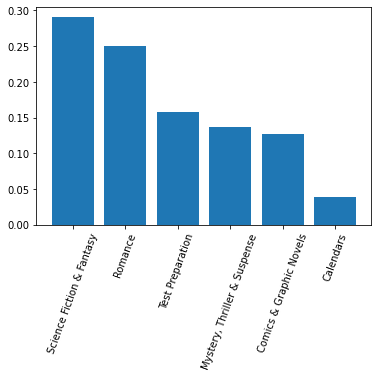

In [ ]:
import matplotlib.pyplot as plt

# Plot class probabilities bar graph
plt.bar(range(len(prob_classes)), list(prob_classes.values()), align='center')
plt.xticks(range(len(prob_classes)), list(prob_classes.keys()), rotation=70)